##### On this file I'll use my own data from Garmin to analize my trainigs

###### The csv file is on data folder. It contains the activities that I log with my Garmin Edge 520.

##### **First the imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

##### **Read the csv into a DataFrame**

In [2]:
df = pd.read_csv('data/Activities.csv')

###### **See how it looks**

In [3]:
df.head()

,Tipo de actividad,Fecha,Favorito,Título,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,Frecuencia cardiaca máxima,Velocidad media,...,Fluidez,Brazadas totales,Tiempo de ascenso,Duración de la inmersión,Temperatura mínima,Intervalo en superficie,Descompresión,Mejor tiempo de vuelta,Número de vueltas,Temperatura máxima
0,Ciclismo en ruta,2020-12-07 18:00:03,False,CTS Test,"36,99",934.000,01:25:03,149,178,"26,1",...,"0,0",6837,1:25:03,0:00,"22,0",0:00,No,08:00.28,5,"0,0"
1,Ciclismo en ruta,2020-12-05 16:20:28,False,EM,"20,03",562.000,00:55:00,140,156,"21,8",...,"0,0",4344,55:00,0:00,"22,0",0:00,No,54:59.64,1,"0,0"
2,Ciclismo en ruta,2020-12-02 18:21:34,False,EM,"22,00",490.000,00:41:45,146,173,"31,6",...,"0,0",3640,41:45,0:00,"18,0",0:00,No,41:45.50,1,"0,0"
3,Ciclismo en ruta,2020-12-01 18:07:50,False,SSI 4x12,"52,87",1.245,01:49:32,146,166,"29,0",...,"0,0",9469,1:49:32,0:00,"21,0",0:00,No,00:05.97,11,"0,0"
4,Ciclismo en ruta,2020-11-30 17:59:21,False,EM,"42,30",1.004,01:27:09,139,161,"29,1",...,"0,0",7830,1:27:09,0:00,"17,0",0:00,No,01:25.05,3,"0,0"


###### There are a lot of columns that I don't need like the 'Titulo', 'Favorito'.... 
###### **Get the keys and drop them** 

In [4]:
df.keys()

Index(['Tipo de actividad', 'Fecha', 'Favorito', 'Título', 'Distancia',
       'Calorías', 'Tiempo', 'Frecuencia cardiaca media',
       'Frecuencia cardiaca máxima', 'Velocidad media', 'Velocidad máxima',
       'Ganancia de altura', 'Altura perdida', 'Longitud media de zancada',
       'Relación vertical media', 'Oscilación vertical media',
       'Cadencia media de pedaleo', 'Cadencia de pedaleo máxima',
       'Normalized Power® (NP®)', 'Training Stress Score®',
       'Potencia media máxima (20 minutos)', 'Potencia media',
       'Potencia máxima', 'Dificultad', 'Fluidez', 'Brazadas totales',
       'Tiempo de ascenso', 'Duración de la inmersión', 'Temperatura mínima',
       'Intervalo en superficie', 'Descompresión', 'Mejor tiempo de vuelta',
       'Número de vueltas', 'Temperatura máxima'],
      dtype='object')

In [5]:
df.drop(['Tipo de actividad', 'Favorito', 'Título', 'Distancia',
       'Calorías', 'Frecuencia cardiaca media',
       'Frecuencia cardiaca máxima', 'Velocidad media', 'Velocidad máxima',
       'Ganancia de altura', 'Altura perdida', 'Longitud media de zancada',
       'Relación vertical media', 'Oscilación vertical media',
       'Cadencia media de pedaleo', 'Cadencia de pedaleo máxima', 'Training Stress Score®',
       'Potencia media máxima (20 minutos)', 'Potencia media',
       'Potencia máxima', 'Dificultad', 'Fluidez', 'Brazadas totales',
       'Tiempo de ascenso', 'Duración de la inmersión', 'Temperatura mínima',
       'Intervalo en superficie', 'Descompresión', 'Mejor tiempo de vuelta',
       'Número de vueltas', 'Temperatura máxima'], inplace=True, axis=1)

###### I started my trining on 2020-10-11. The 'Fecha' is stored as a string
###### **Drop the rows before that date**

In [6]:
df = df[df['Fecha'] > '2020-10-11 ']

###### **Now I need to remove the time from the date**
###### Will create a function for that because I'll need it later

In [7]:
def remove_time_from_date(data_frame):
    for i in range(data_frame.shape[0]):
        data_frame['Fecha'][i] = data_frame['Fecha'][i].split(' ')[0]

In [8]:
remove_time_from_date(df)

###### **Now I can chage the 'Fecha' into a datetime**

In [9]:
df['Fecha']= pd.to_datetime(df['Fecha'])

###### **Do a rename and change type to numeric**

In [10]:
df = df.rename(columns={'Normalized Power® (NP®)':'NP'})

In [11]:
df['NP']= pd.to_numeric(df['NP'])

###### **df doesn't contain all the dates from 2020-10-11. It only contains the dates that I've trained. I need another DataFrame that contains all the dates**

In [12]:
begin_date = '2020-10-12'
end_date = '2020-12-7' # This is the last date of my training
df1 = pd.DataFrame({'Fecha':pd.date_range(begin_date, end_date)})

###### **I'll merge df1 and df so I need to change the index**

In [13]:
df1.set_index("Fecha", inplace = True)
df.set_index("Fecha", inplace = True)

In [14]:
df_merged = df1.merge(df, on='Fecha', how='left')

In [15]:
df_merged.head()

,Tiempo,NP
Fecha,,
2020-10-12,00:57:26,191.0
2020-10-13,01:10:16,186.0
2020-10-14,NaN,NaN
2020-10-15,00:54:21,207.0
2020-10-16,"00:07:40,1",279.0


###### **I'll fill NaNs with 0 or 0:0:0 (for the 'Tiempo' column)**

In [16]:
df_merged['NP']=df_merged['NP'].fillna(0)
df_merged['Tiempo']=df_merged['Tiempo'].fillna('0:0:0')

###### **I know that my FTP is 230, I'll create a new row df_merged with my current FTP**

In [17]:
ftp = 230
ftp_array=[]
for i in range(df_merged.shape[0]):
    ftp_array.append(230)

In [18]:
df_merged['FTP'] = ftp_array

In [19]:
df_merged.head()

,Tiempo,NP,FTP
Fecha,,,
2020-10-12,00:57:26,191.0,230
2020-10-13,01:10:16,186.0,230
2020-10-14,0:0:0,0.0,230
2020-10-15,00:54:21,207.0,230
2020-10-16,"00:07:40,1",279.0,230


###### **I need NP as int**

In [20]:
df_merged.NP = df_merged.NP.astype(int)

##### Now the calculations :) 

**IntensityFactor is defined as NP/FTP on each ride**

In [23]:
intensity_factor = df_merged.NP/df_merged.FTP
df_merged['IF'] = intensity_factor

**The TSS is calculated based on the time in seconds of each ride**
###### The time ('Tiempo') is a string

In [24]:
time_in_seconds=[]
for i in range(df_merged.Tiempo.shape[0]):
    splits = df_merged.Tiempo[i].split(':')
    time_in_sec= int(splits[0])*3600+int(splits[1])*60+int(splits[2].split(',')[0])
    time_in_seconds.append(time_in_sec)

##### **Add the new row**

In [25]:
df_merged['Seconds'] = time_in_seconds

**Calculate the TSS**

In [26]:
df_merged['TSS'] = (df_merged['Seconds']*df_merged['NP']*df_merged['IF'])/(df_merged['FTP']*3600)*100

###### **Now I can drop 'Tiempo'**

In [27]:
df_merged.drop(['Tiempo'], inplace=True, axis=1)

In [28]:
df_merged.head()

,NP,FTP,IF,Seconds,TSS
Fecha,,,,,
2020-10-12,191,230,0.830435,3446,66.012143
2020-10-13,186,230,0.808696,4216,76.589338
2020-10-14,0,230,0.000000,0,0.000000
2020-10-15,207,230,0.900000,3261,73.372500
2020-10-16,279,230,1.213043,460,18.802174


##### **ATL is kown as 'Fatigue'**
###### The formula is Today_ATL = ATL_from_yesterday * (e^(-1/7)) + Today_TSS * (1-e^(-1/7))

In [29]:
atl=[]
count = 0
for i in reversed(df_merged.index):
    yesterday_atl = 0
    if (count!=0):
        yesterday_atl = atl[count-1]
    current_atl = yesterday_atl*math.exp(-1/7) + df_merged.iloc[count].TSS * (1-math.exp(-1/7))
    atl.append(current_atl)
    count+=1

In [32]:
df_merged['Fatigue'] = atl

##### **CTL is kown as 'Fitness'**
###### The formula is Today_CTL = CTL_from_yesterday * (e^(-1/42)) + Today_TSS * (1-e^(-1/42))

In [35]:
ctl=[]
count = 0
for i in reversed(df_merged.index):
    yesterday_ctl = 0
    if (count!=0):
        yesterday_ctl = ctl[count-1]
    current_ctl = yesterday_ctl*math.exp(-1/42) + df_merged.iloc[count].TSS * (1-math.exp(-1/42))
    ctl.append(current_ctl)
    count+=1

In [36]:
df_merged['Fitness'] = ctl

##### **TSB is kown as 'Freshness'**
###### The formula is TSB = CTL - ATL

In [37]:
df_merged['Freshness'] = df_merged.Fitness - df_merged.Fatigue

In [38]:
df_merged.head(10)

,NP,FTP,IF,Seconds,TSS,Fatigue,Fitness,Freshness
Fecha,,,,,,,,
2020-10-12,191,230,0.830435,3446,66.012143,8.787675,1.553154,-7.234521
2020-10-13,186,230,0.808696,4216,76.589338,17.813575,3.318629,-14.494946
2020-10-14,0,230,0.000000,0,0.000000,15.442194,3.240547,-12.201647
2020-10-15,207,230,0.900000,3261,73.372500,23.153998,4.890634,-18.263364
2020-10-16,279,230,1.213043,460,18.802174,22.574674,5.217949,-17.356725
2020-10-16,207,230,0.900000,441,9.922500,20.890390,5.328639,-15.561751
2020-10-16,185,230,0.804348,3728,66.997900,27.028319,6.779613,-20.248706
2020-10-17,0,230,0.000000,0,0.000000,23.430252,6.620100,-16.810152
2020-10-18,166,230,0.721739,7187,103.993369,34.154984,8.911129,-25.243855


##### **Plot the values an see how it looks**

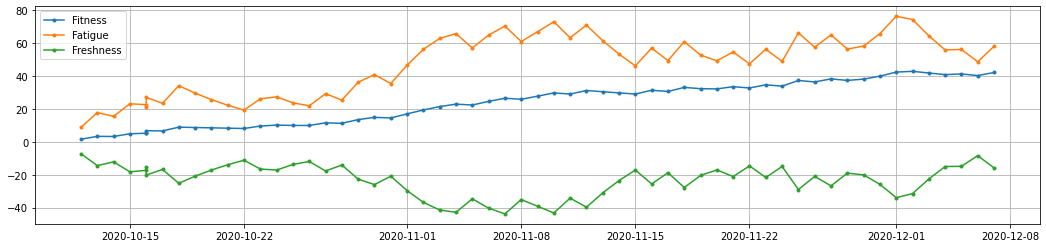

In [39]:
plt.figure(figsize=(18,4))
plt.plot_date(df_merged.index, df_merged['Fitness'], '.-', label='Fitness')
plt.plot_date(df_merged.index, df_merged['Fatigue'], '.-', label='Fatigue')
plt.plot_date(df_merged.index, df_merged['Freshness'], '.-', label='Freshness')

plt.legend(loc='upper left')

plt.grid()
plt.show()

##### **I have multiple rides on a same day, I need to merge them into one day**

In [40]:
df_merged.reset_index(drop=False, inplace=True)
aggregation_functions = {'Fecha': 'first','NP':'mean', 'FTP': 'first', 'IF':'mean', 'Seconds':'sum', 'TSS':'sum', 'Fatigue':'mean','Fitness':'mean','Freshness':'mean'}
df_new = df_merged.groupby(df_merged['Fecha']).aggregate(aggregation_functions)
df_new['Fecha'] = df_new['Fecha'].apply(lambda x: x.strftime('%Y-%m-%d'))
for i in range(df_new.shape[0]):
    df_new['Fecha'][i] = df_new['Fecha'][i].split(' ')[0]
    
df_new.reset_index(drop=True, inplace=True)

<ipython-input-40-8efbab4d98fa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Fecha'][i] = df_new['Fecha'][i].split(' ')[0]


##### **Plot the values again**

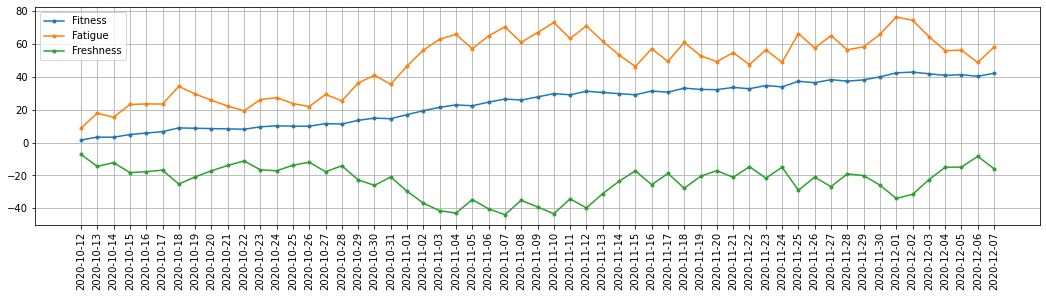

In [41]:
plt.figure(figsize=(18,4))
plt.plot_date(df_new['Fecha'], df_new['Fitness'], '.-', label='Fitness')
plt.plot_date(df_new['Fecha'], df_new['Fatigue'], '.-', label='Fatigue')
plt.plot_date(df_new['Fecha'], df_new['Freshness'], '.-', label='Freshness')

plt.legend(loc='upper left')
x = range(df_new.shape[0])
plt.xticks(x, df_new.Fecha)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.grid()
plt.show()

**NICE....**